In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [4]:
df_ign = pd.read_csv('ign_reviews_final.csv')
df_ign

,title,score,url,datetime,author,date
0,Foamstars Review,6.0,/articles/foamstars-review,2024-02-15T02:10:08.000Z,Charlie Wacholz,2024-02-15
1,Atomic Heart: Trapped in Limbo Review,3.0,/articles/atomic-heart-trapped-in-limbo-review,2024-02-13T07:12:20.529Z,Luke Reilly,2024-02-13
2,Granblue Fantasy: Relink Review,8.0,/articles/granblue-fantasy-relink-review,2024-01-31T15:00:00.000Z,George Yang,2024-01-31
3,Persona 3 Reload Review,9.0,/articles/persona-3-reload-review,2024-01-30T13:00:00.000Z,Michael Higham,2024-01-30
4,Like a Dragon: Infinite Wealth Review,9.0,/articles/like-a-dragon-infinite-wealth-review,2024-01-23T15:00:00.000Z,Tristan Ogilvie,2024-01-23
...,...,...,...,...,...,...
13389,Horizon Call of the Mountain Review,7.0,/articles/horizon-call-of-the-mountain-review,2023-02-16T13:00:48.000Z,Simon Cardy,2023-02-16
13390,Dbrand Darkplates 2.0 Review,8.0,/articles/dbrand-darkplates-20-review,2022-01-31T16:00:27.000Z,Nic Vargus,2022-01-31
13391,PlayStation 5 Review (2020),8.0,/articles/playstation-5-review-2020,2021-11-06T07:00:00.000Z,Luke Reilly,2021-11-06
13392,Final Fantasy 7 Remake: Intergrade - Episode: ...,8.0,/articles/final-fantasy-7-remake-intergrade-ep...,2021-06-15T19:04:14.842Z,Mitchell Saltzman,2021-06-15


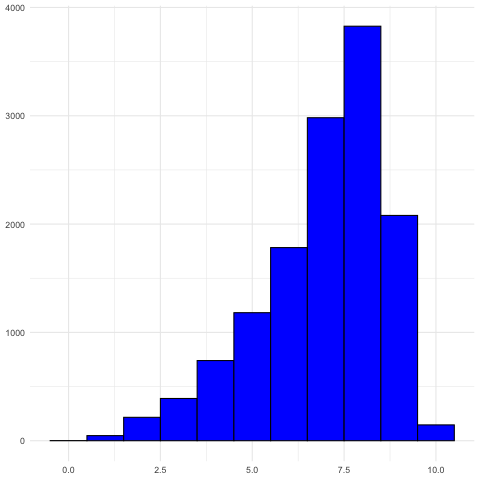

In [12]:
%%R -i df_ign

#plot a histogram of the scores

ign_histogram <- df_ign %>%
    ggplot(aes(x = score)) +
    geom_histogram(binwidth = 1, fill = "blue", color = "black") +
    theme_minimal() +
    # remove axis labels
    theme(axis.title.x = element_blank(), axis.title.y = element_blank()) 

ign_histogram

In [14]:
%%R

# save plot as svg
ggsave("graphs/ign_histogram.svg", plot = ign_histogram, width = 10, height = 10, units = "in")

In [7]:
df_ign[df_ign['score'] == 0]

,title,score,url,datetime,author,date
8294,Olympic Hockey Nagano '98 Review,0.0,/articles/1998/01/01/olympic-hockey-nagano-98,1998-01-01T08:00:00.000Z,Matt Casamassina,1998-01-01


In [15]:
# create column for year
df_ign['year'] = df_ign['date'].str[:4]
df_ign['year'] = df_ign['year'].astype(int)
df_ign

,title,score,url,datetime,author,date,year
0,Foamstars Review,6.0,/articles/foamstars-review,2024-02-15T02:10:08.000Z,Charlie Wacholz,2024-02-15,2024
1,Atomic Heart: Trapped in Limbo Review,3.0,/articles/atomic-heart-trapped-in-limbo-review,2024-02-13T07:12:20.529Z,Luke Reilly,2024-02-13,2024
2,Granblue Fantasy: Relink Review,8.0,/articles/granblue-fantasy-relink-review,2024-01-31T15:00:00.000Z,George Yang,2024-01-31,2024
3,Persona 3 Reload Review,9.0,/articles/persona-3-reload-review,2024-01-30T13:00:00.000Z,Michael Higham,2024-01-30,2024
4,Like a Dragon: Infinite Wealth Review,9.0,/articles/like-a-dragon-infinite-wealth-review,2024-01-23T15:00:00.000Z,Tristan Ogilvie,2024-01-23,2024
...,...,...,...,...,...,...,...
13389,Horizon Call of the Mountain Review,7.0,/articles/horizon-call-of-the-mountain-review,2023-02-16T13:00:48.000Z,Simon Cardy,2023-02-16,2023
13390,Dbrand Darkplates 2.0 Review,8.0,/articles/dbrand-darkplates-20-review,2022-01-31T16:00:27.000Z,Nic Vargus,2022-01-31,2022
13391,PlayStation 5 Review (2020),8.0,/articles/playstation-5-review-2020,2021-11-06T07:00:00.000Z,Luke Reilly,2021-11-06,2021
13392,Final Fantasy 7 Remake: Intergrade - Episode: ...,8.0,/articles/final-fantasy-7-remake-intergrade-ep...,2021-06-15T19:04:14.842Z,Mitchell Saltzman,2021-06-15,2021


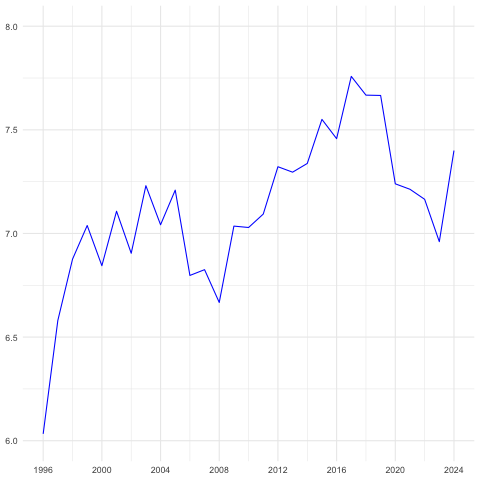

In [22]:
%%R -i df_ign

#group data by year, then plot mean of scores
ign_yearly <- df_ign %>%
    group_by(year) %>%
    summarise(mean_score = mean(score)) %>%
    ggplot(aes(x = year, y = mean_score)) +
    geom_line(color = "blue") +
    # geom_point(color = "blue") +
    theme_minimal() +
    # labs(title = "Mean IGN Score by Year", x = "Year", y = "Mean Score")
    #y axis range from 6 to 8
    scale_y_continuous(limits = c(6, 8)) + 
    # show every year on x axis
    scale_x_continuous(breaks = seq(1996, 2024, 4)) +
    # remove axis labels
    theme(axis.title.x = element_blank(), axis.title.y = element_blank())

ign_yearly

In [23]:
%%R

# save plot as svg
ggsave("graphs/ign_yearly.svg", plot = ign_yearly, width = 10, height = 10, units = "in")

In [25]:
df_metacritic = pd.read_csv('metacritic-scores.csv')
df_metacritic

,Unnamed: 0,name,platform,release_date,metascore,user_score
0,0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998",99,9.1
1,1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,7.4
2,2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",98,7.8
3,3,SoulCalibur,Dreamcast,"September 8, 1999",98,8.4
4,4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",98,7.9
...,...,...,...,...,...,...
19821,19821,Vroom in the Night Sky,Switch,"April 5, 2017",17,3.2
19822,19822,Leisure Suit Larry: Box Office Bust,PlayStation 3,"May 5, 2009",17,1.9
19823,19823,Yaris,Xbox 360,"October 10, 2007",17,4.4
19824,19824,Ride to Hell: Retribution,PC,"June 24, 2013",16,1.4


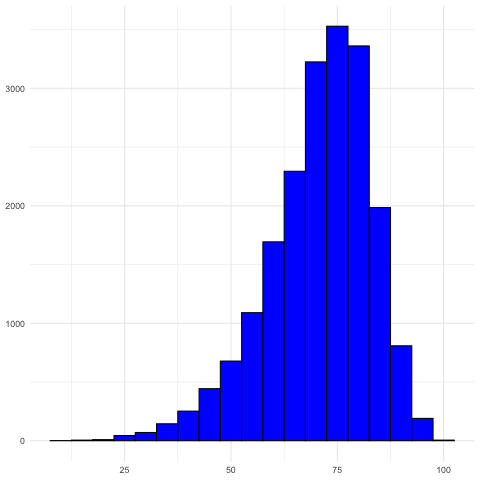

In [30]:
%%R -i df_metacritic

#plot a histogram of the metascores

metascore_histogram <- df_metacritic %>%
    ggplot(aes(x = metascore)) +
    geom_histogram(binwidth = 5, fill = "blue", color = "black") +
    theme_minimal() +
    # remove axis labels
    theme(axis.title.x = element_blank(), axis.title.y = element_blank())

metascore_histogram

In [44]:
%%R

# save plot as svg
ggsave("graphs/metascore_histogram.svg", plot = metascore_histogram, width = 10, height = 10, units = "in")

In [34]:
# Replace 'tbd' with NaN
df_metacritic['user_score'] = df_metacritic['user_score'].replace('tbd', np.nan)

# Convert 'user_score' to float
df_metacritic['user_score'] = df_metacritic['user_score'].astype(float)

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 1424 rows containing non-finite values (`stat_bin()`). 



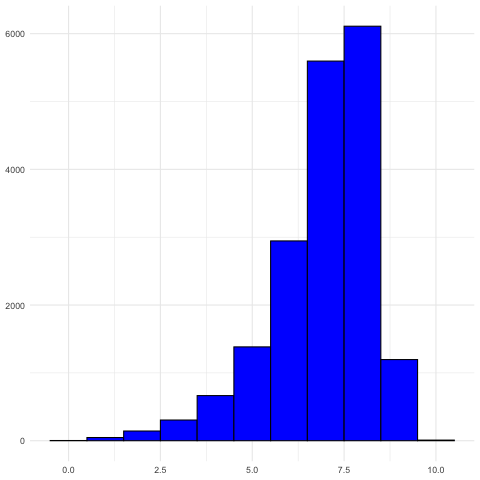

In [37]:
%%R -i df_metacritic

#plot user_score histogram

user_score_histogram <- df_metacritic %>%
    ggplot(aes(x = user_score)) +
    geom_histogram(binwidth = 1, fill = "blue", color = "black") +
    theme_minimal() +
    # remove axis labels
    theme(axis.title.x = element_blank(), axis.title.y = element_blank())

user_score_histogram

In [45]:
%%R

# save plot as svg
ggsave("graphs/user_score_histogram.svg", plot = user_score_histogram, width = 10, height = 10, units = "in")

In addition: Warning message:
Removed 1424 rows containing non-finite values (`stat_bin()`). 


In [38]:
#add year column from last 4 chars of release_date column
df_metacritic['year'] = df_metacritic['release_date'].str[-4:]

#cast year as int
df_metacritic['year'] = df_metacritic['year'].astype(int)

df_metacritic

,Unnamed: 0,name,platform,release_date,metascore,user_score,year
0,0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998",99,9.1,1998
1,1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,7.4,2000
2,2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",98,7.8,2008
3,3,SoulCalibur,Dreamcast,"September 8, 1999",98,8.4,1999
4,4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",98,7.9,2008
...,...,...,...,...,...,...,...
19821,19821,Vroom in the Night Sky,Switch,"April 5, 2017",17,3.2,2017
19822,19822,Leisure Suit Larry: Box Office Bust,PlayStation 3,"May 5, 2009",17,1.9,2009
19823,19823,Yaris,Xbox 360,"October 10, 2007",17,4.4,2007
19824,19824,Ride to Hell: Retribution,PC,"June 24, 2013",16,1.4,2013


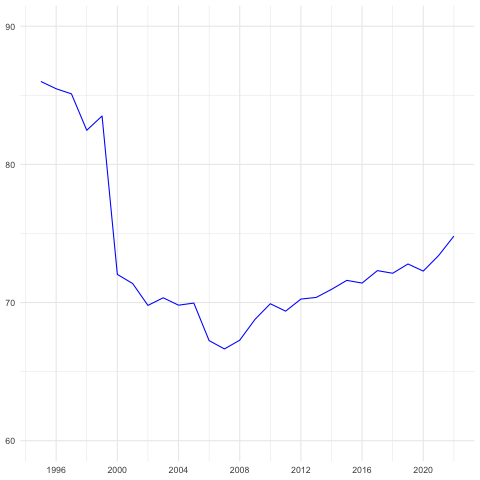

In [43]:
%%R -i df_metacritic

#group data by year, then plot mean of metascores
metacritic_yearly <- df_metacritic %>%
    group_by(year) %>%
    summarise(mean_metascore = mean(metascore)) %>%
    ggplot(aes(x = year, y = mean_metascore)) +
    geom_line(color = "blue") +
    # geom_point(color = "blue") +
    theme_minimal() +
    # labs(title = "Mean Metacritic Score by Year", x = "Year", y = "Mean Score")
    #y axis range from 60 to 90
    scale_y_continuous(limits = c(60, 90)) + 
    # show every year on x axis
    scale_x_continuous(breaks = seq(1996, 2024, 4)) +
    # remove axis labels
    theme(axis.title.x = element_blank(), axis.title.y = element_blank())

metacritic_yearly

In [46]:
%%R

# save plot as svg
ggsave("graphs/metacritic_yearly.svg", plot = metacritic_yearly, width = 10, height = 10, units = "in")